In [93]:
# -*- coding: utf-8 -*- 
from __future__ import print_function, division, absolute_import

import sys
import re

import csvkit as csv

allReports = ""
with open("lpch_eeg_reports_interp_impression.csv") as cf:
    reader = csv.DictReader(cf)
    for line in reader:
        allReports += line['note'] + " \n\n"
        # print(desc)
        # now manipulate the note body
        
f = open("allReports.txt", "w")
f.write(allReports)
f.close()

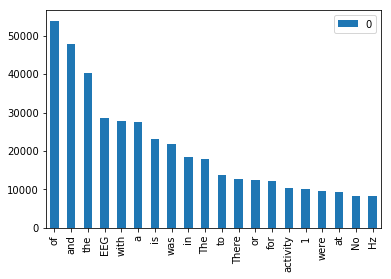

In [122]:
#make a histogram of the most commonly used words in all EEG reports
from collections import Counter
import pandas
import matplotlib.pyplot as plt


words = allReports.split()
letter_counts = Counter(words)
df = pandas.DataFrame.from_dict(letter_counts, orient='index')
df = df.sort_values(by=0, ascending=0)
df1 = df[:20]
plt.show(block=True)
df1.plot(kind='bar')

In [95]:
# most common bigrams
import nltk
from nltk import bigrams
report = allReports.lower()
reportNLTK = nltk.Text(nltk.tokenize.word_tokenize(report))
reportNLTK.collocations()

dosing weight; sodium chloride; international 10-20; identifying
information; information name; chloride 0.9; requesting physician;
detailed findings; photic stimulation; artifact detection; single
channel; report identifying; 10-20 system; month old; interpreting
attending; regular rate; epileptiform discharges; monitoring lead;
showed regular; lead showed


In [96]:
# generate some eeg reports for me by sequencing bigrams
def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=' ')
        word = cfdist[word].max()

import nltk
from nltk.corpus import stopwords

#text = nltk.corpus.genesis.words('english-kjv.txt')
#print(type(text))
corpus = nltk.corpus.reader.plaintext.PlaintextCorpusReader(".", "allReports.txt")
words=corpus.words()
#get rid of stop words
#filtered_words = [word for word in words if word not in stopwords.words('english')]
#words = filtered_words

#print(type(words))
bigrams = nltk.bigrams(words)
cfd = nltk.ConditionalFreqDist(bigrams)
generate_model(cfd, 'seizure')
#filtered_words = [word for word in word_list if word not in stopwords.words('english')]

seizure . There was a continuous , MD , MD , MD , MD , 

In [97]:
generate_model(cfd, 'epileptic')
print("")
generate_model(cfd, 'slow')
print("")
generate_model(cfd, 'discharge')
print("")
generate_model(cfd, 'periodic')
print("")
generate_model(cfd, 'impression')
print("")
generate_model(cfd, 'background')
print("")
generate_model(cfd, 'infantile')
print("")
generate_model(cfd, 'neonatal')
print("")
generate_model(cfd, 'seizure')
print("")
generate_model(cfd, 'seizures')
print("")
generate_model(cfd, 'This')
print("")
generate_model(cfd, 'electrographic')
print("")
generate_model(cfd, 'indicates')
print("")
generate_model(cfd, 'represent')
print("")
generate_model(cfd, 'generalized')
print("")
generate_model(cfd, 'slowing')
print("")
generate_model(cfd, 'focal')
print("")
generate_model(cfd, '3')
print("")
generate_model(cfd, 'hz')
print("")
generate_model(cfd, 'second')
print("")
generate_model(cfd, 'button')
print("")
generate_model(cfd, 'cry')
print("")
generate_model(cfd, 'clonic')
print("")
generate_model(cfd, 'tonic')
print("")
generate_model(cfd, 'partial')
print("")
generate_model(cfd, 'sleep')
print("")
generate_model(cfd, 'vertex')
print("")
generate_model(cfd, 'temporal')
print("")
generate_model(cfd, 'frontal')
print("")
generate_model(cfd, 'occipital')
print("")
generate_model(cfd, 'hypsarrythmia')
print("")
generate_model(cfd, 'alpha')
print("")
generate_model(cfd, 'beta')
print("")
generate_model(cfd, 'delta')
print("")
generate_model(cfd, 'theta')
print("")
generate_model(cfd, 'sudden')
print("")
generate_model(cfd, 'waxing')
print("")
generate_model(cfd, 'waning')

epileptic event . There was a continuous , MD , MD , MD , MD 
slow activity . There was a continuous , MD , MD , MD , MD 
discharge . There was a continuous , MD , MD , MD , MD , 
periodic discharges . There was a continuous , MD , MD , MD , MD 
impression . There was a continuous , MD , MD , MD , MD , 
background consisted of the background consisted of the background consisted of the background consisted of 
infantile spasms . There was a continuous , MD , MD , MD , MD 
neonatal encephalopathy . There was a continuous , MD , MD , MD , MD 
seizure . There was a continuous , MD , MD , MD , MD , 
seizures . There was a continuous , MD , MD , MD , MD , 
This is a continuous , MD , MD , MD , MD , MD , 
electrographic seizures . There was a continuous , MD , MD , MD , MD 
indicates cerebral dysfunction -- as well - channel EKG rhythm . There was a continuous 
represent a continuous , MD , MD , MD , MD , MD , MD 
generalized spike and rhythm . There was a continuous , MD , MD , MD 
slowing 

In [98]:
#fraction of words in text that are not in the stopword list
def content_fraction(text):
     stopwords = nltk.corpus.stopwords.words('english')
     content = [w for w in text if w.lower() not in stopwords]
     return len(content) / len(text)

content_fraction(words)

0.8127736996571808

In [ ]:
#tutorial example of classification
import random
from nltk.corpus import movie_reviews
documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000] 

def document_features(document): 
    document_words = set(document) 
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

print(document_features(movie_reviews.words('pos/cv957_8737.txt'))) 

In [100]:
#tutorial continued
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set)) 
classifier.show_most_informative_features(5)

0.66
Most Informative Features
          contains(sans) = True              neg : pos    =      9.0 : 1.0
    contains(mediocrity) = True              neg : pos    =      7.7 : 1.0
     contains(dismissed) = True              pos : neg    =      7.0 : 1.0
         contains(tripe) = True              neg : pos    =      7.0 : 1.0
   contains(bruckheimer) = True              neg : pos    =      6.3 : 1.0


In [ ]:
#tutorial
#what does it containt 
movie_reviews.categories()
movie_reviews.fileids('neg')
movie_reviews.categories()
i = 1
for doc in documents:
    print(str(i) + ": "+ doc[1])
    i += 1

In [ ]:
from nltk.corpus import names
labeled_names = ([(name, 'male') for name in names.words('male.txt')] +
[(name, 'female') for name in names.words('female.txt')])
import random
random.shuffle(labeled_names)
def gender_features2(name):
    features = {}
    features["first_letter"] = name[0].lower()
    features["last_letter"] = name[-1].lower()
    for letter in 'abcdefghijklmnopqrstuvwxyz':
        features["count({})".format(letter)] = name.lower().count(letter)
        features["has({})".format(letter)] = (letter in name.lower())
    return features

featuresets = [(gender_features2(n), gender) for (n, gender) in labeled_names]
print(featuresets[1])


In [103]:
exclude = set(string.punctuation)
print(exclude)

set(['!', '#', '"', '%', '$', "'", '&', ')', '(', '+', '*', '-', ',', '/', '.', ';', ':', '=', '<', '?', '>', '@', '[', ']', '\\', '_', '^', '`', '{', '}', '|', '~'])


In [104]:
#find the most common word associated with the interpretation result (abnormal versus normal)
#should take 10 mins
import random
import string
from nltk.corpus import stopwords
documents = list()
notebody = list()
result = list()
exclude = set(string.punctuation)

with open("lpch_eeg_reports_interp_impression.csv") as cf:
    reader = csv.DictReader(cf)
    for line in reader:
        notebody = line['note'].lower()
        notebody = ''.join(ch for ch in notebody if ch not in exclude)
        notebody = notebody.split() 
        notebody = [word for word in notebody if word not in stopwords.words('english')]
        category = line['impression']
        if (category == 'abnormal' or category == 'normal'):
            documents.append((list(notebody), category))

#documents[1]
        # print(desc)
        # now manipulate the note body

random.shuffle(documents)
#documents[1]


In [ ]:
i = 1
for doc in documents:
    print(doc[0])
    i += 1
    break

In [106]:
# constructing a list of the 2000 most frequent words in the overall corpus
import nltk
words = list()
for doc in documents:
    words += doc[0] 
    
#print(words)    
all_words = nltk.FreqDist(w for w in words)
word_features = list(all_words)[:4000]

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

for (d,c) in documents:
    print(c)
    

In [107]:
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set)) 
classifier.show_most_informative_features(30)

0.77
Most Informative Features
         contains(types) = True           abnorm : normal =     43.3 : 1.0
contains(hyperexcitability) = True           abnorm : normal =     37.9 : 1.0
     contains(indicates) = True           abnorm : normal =     35.2 : 1.0
      contains(periodic) = True           abnorm : normal =     23.5 : 1.0
      contains(quadrant) = True           abnorm : normal =     22.4 : 1.0
   contains(suppression) = True           abnorm : normal =     20.9 : 1.0
      contains(norcuron) = True           abnorm : normal =     20.6 : 1.0
         contains(mcgkg) = True           abnorm : normal =     19.4 : 1.0
       contains(spreads) = True           abnorm : normal =     19.1 : 1.0
    contains(hypertonic) = True           abnorm : normal =     17.8 : 1.0
       contains(unitsml) = True           abnorm : normal =     17.3 : 1.0
      contains(nembutal) = True           abnorm : normal =     16.4 : 1.0
       contains(maximum) = True           abnorm : normal =     14

In [ ]:
for (d) in documents:
    print(d)
    break

In [ ]:
# in order to load a corpus, reports must be in separate files

capture_eegno = r'(?:DATE OF SERVICE:|STUDY DATE:|DATE EEG:|Date:|Service Date:|Study date|Study dates|DATE OF EEG:|start|T:|test dates:|Date of study:|Exam date|exam date:)\s*(?P<eegno>[\d/-]+)\s*'
capture_eegno1 = r'(?:Date:|Study date |Study date:)\s*(?P<eegno>(?:Jan|Feb|Mar|Apr|May|Jun|July|Aug|Sep|Oct|Nov|Dec)\s*[,\s\d/-]+)(?:[a-z]+)'
capture_eegno2 = r'(?<!DOB:  )(?P<eegno>[\d]+/[\d]+/[\d]+)' #DOB:  10/04/1993   
eegDateRange = r'(?P<eegno>[\d/]+-[\d/]+)'
eegDateStrict = r'(?P<eegno>[\d]+/[\d]+/[\d]+)'
#capture_eegno = r'(?P<eegno>[0-9]+)\s*'
re_eegno = re.compile(capture_eegno, re.DOTALL|re.MULTILINE|re.IGNORECASE)
re_eegno1 = re.compile(capture_eegno1, re.DOTALL|re.MULTILINE|re.IGNORECASE)
re_eegno2 = re.compile(capture_eegno2, re.DOTALL|re.MULTILINE|re.IGNORECASE)
eegDateRange = re.compile(eegDateRange, re.DOTALL|re.MULTILINE|re.IGNORECASE)
eegDateStrict = re.compile(eegDateStrict, re.DOTALL|re.MULTILINE|re.IGNORECASE)

out_file = open("lpch_eeg_reports_interp_date_impression.csv",'w')

i=2
with open("lpch_eeg_reports_interp_impression.csv") as cf:
    reader = csv.DictReader(cf)
    outfieldnames = reader.fieldnames
    outfieldnames.append('date')
    writer = csv.DictWriter(out_file, fieldnames=outfieldnames, restval='***')
    writer.writeheader()
    
    for line in reader:
        eeg_no=""
        m = re_eegno.search(line['note'])
        print(str(i) + ": ", end='')
        #print(str(i) + ": " + str(type(m)), end='')
        if m:
            eeg_no = m.group('eegno')
            #print(eeg_no)
        else:
            m = re_eegno1.search(line['note'])
            if m:
                eeg_no = m.group('eegno')
                #print(eeg_no)
            else:
                #print("!!!!!!!!!!!")
                for match in re.finditer(capture_eegno2,line['note']):
                    eeg_no = match.group('eegno')
                    
                #m = re_eegno2.search(line['note'])
                #if m:
                #    eeg_no = m.group('eegno')
                #print(eeg_no +"???????")

        #if len(eeg_no) > 12:
        #    m = eegDateRange.search(eeg_no)            
        #    if m:
        #        print("bad")
        #        m = eegDateStrict.search(eeg_no)
        #        m = eegDateStrict.search(eeg_no)
        #        if m:
        #            eeg_no = m.group('eegno')
        if ((len(eeg_no) < 5) | (len(eeg_no) > 12)):
            #print("possibly bad: " + eeg_no)
            for match in re.finditer(capture_eegno2,line['note']):
                eeg_no = match.group('eegno')
        line['date'] = eeg_no 
        writer.writerow(line)
        
        #print(eeg_no)    
        #i += 1
        #if (i>600):
        #    break

In [110]:
# in order to load a corpus, reports must be in separate files
from dateutil import parser

i=2
with open("lpch_eeg_reports_interp_date_impression.csv") as cf:
    reader = csv.DictReader(cf)
    
    for line in reader:
        date_str= line['date']
        try:
            dateObj = parser.parse(date_str)
            #print(dateObj.date())
            dateFile = (str(dateObj.date()))
            f = open("reports/" + dateFile + ".txt", "a+")
            f.write(line['note'])
            f.close()
        except:
            print("Unexpected error:", str(sys.exc_info()[0]) + date_str)

Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>0/01/1975
Unexpected error: <type 'exceptions.ValueError'>4/6-7/2012
Unexpected error: <type 'exceptions.ValueError'>
Unexpected error: <type 'exceptions.ValueError'>11/07-8/2013
Unexpected error: <type 'exceptions.ValueError'>316501658
Unexpected error: <type 'exceptions.ValueError'>318488965
Unexpected error: <type 'exceptions.ValueError'>6/30//2014
Unexpected error: <type 'exceptions.ValueError'>7/24-25/2015
Unexpected error: <type 'exceptions.ValueError'>8/6-8/7/2015
Unexpected error: <type 'exceptions.ValueError'>8/12-8/14/15
Unexpected error: <type 'exceptions.ValueError'>9/1-9/3/2015
Unexpected error: <type 'exceptions.ValueError'>9/1-9/2/2015
Unexpected error: <type 'exceptions.ValueError'>9/2-9/3/2015
Unexpected error: <type 'exceptions.ValueError'>9/2-9/3/2015
Unexpected error: <type 'exceptions.ValueError'>8/31-9/2/15
Unexpected error: <type 'exceptions.ValueError'>9/8-9/9/2015
U

TypeError: cannot concatenate 'str' and 'NoneType' objects

In [ ]:
import nltk
import os
from nltk.corpus import PlaintextCorpusReader

#fileids = os.listdir("reports")
corpus_root = 'reports'
wordlists = PlaintextCorpusReader(corpus_root, '.*')
wordlists.fileids()

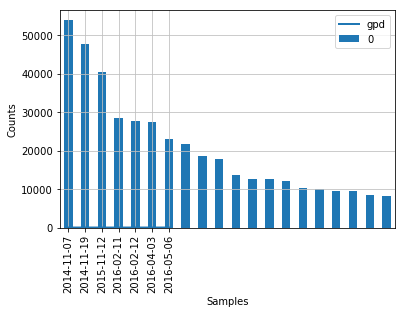

In [112]:
cfd = nltk.ConditionalFreqDist(
           (target, fileid[:10])
           for fileid in wordlists.fileids()
           for w in wordlists.words(fileid)
           for target in ['grda', 'gpd']
           if w.lower().startswith(target))
cfd.plot()

In [113]:
cfd.tabulate(conditions=['grda','gpd'], samples=range(10), cumulative=True)

     0 1 2 3 4 5 6 7 8 9 
grda 0 0 0 0 0 0 0 0 0 0 
 gpd 0 0 0 0 0 0 0 0 0 0 


In [ ]:
#see if there are natural clusters, unsupervised
#ngram of word, each one is dimension of word, then 
#applied text analysis python machine learning approaches on slack

In [114]:
# try tagging 

textAll_tokenized = list()
with open("lpch_eeg_reports_interp_impression.csv") as cf:
    reader = csv.DictReader(cf)
    for line in reader:
        #print(line['note'])
        text_raw = line['note'].lower()
        text_tokenized = nltk.tokenize.word_tokenize(text_raw)
        textAll_tokenized += text_tokenized
        #words = list(text_raw.split())
        #print(words)
        #break

text = nltk.Text(textAll_tokenized)
text_tagged = nltk.pos_tag(text)

        #print(text[10:200])
print(text.similar('alpha'))



theta delta beta hz spike activity slowing sharp spikes fast slow
sharps epileptiform the seizure rhythmic and discharges faster sleep
None


which of these tags are the most common

Tag	Meaning	English Examples
ADJ	adjective	new, good, high, special, big, local
ADP	adposition	on, of, at, with, by, into, under
ADV	adverb	really, already, still, early, now
CONJ	conjunction	and, or, but, if, while, although
DET	determiner, article	the, a, some, most, every, no, which
NOUN	noun	year, home, costs, time, Africa
NUM	numeral	twenty-four, fourth, 1991, 14:24
PRT	particle	at, on, out, over per, that, up, with
PRON	pronoun	he, their, her, its, my, I, us
VERB	verb	is, say, told, given, playing, would

In [115]:
nltk.help.upenn_tagset('NN.*')
nltk.help.upenn_tagset('JJ.*')
nltk.help.upenn_tagset('NN')
nltk.help.upenn_tagset('JJ')


NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
NNP: noun, proper, singular
    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
NNPS: noun, proper, plural
    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth s

In [116]:
tag_fd = nltk.FreqDist(tag for (word, tag) in text_tagged)
tag_fd.most_common()

[('NN', 680215),
 ('JJ', 331114),
 ('IN', 180250),
 (':', 145348),
 ('CD', 134922),
 ('NNS', 125661),
 ('DT', 123082),
 ('.', 107094),
 (',', 101510),
 ('CC', 76283),
 ('VBD', 57797),
 ('VBZ', 48154),
 ('VBG', 46203),
 ('RB', 46159),
 ('VBN', 41991),
 (')', 38938),
 ('(', 37285),
 ('VBP', 22618),
 ('VB', 20343),
 ('EX', 17137),
 ('TO', 14502),
 ('NNP', 8350),
 ('PRP', 6502),
 ('JJR', 4920),
 ('WDT', 3571),
 ('$', 3260),
 ('MD', 3134),
 ('FW', 3044),
 ('PRP$', 2911),
 ('RBR', 2400),
 ("''", 1461),
 ('``', 1433),
 ('RP', 1375),
 ('WRB', 948),
 ('RBS', 893),
 ('JJS', 864),
 ('POS', 782),
 ('WP', 316),
 ('#', 306),
 ('UH', 147),
 ('SYM', 87),
 ('PDT', 78)]

In [117]:
word_tag_pairs = nltk.bigrams(text_tagged)
#i = 0
#for (a, b) in word_tag_pairs:
#    print(b[1])
#    i += 1
#    if i>22:
#        break
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'JJ']
#print(noun_preceders)
fdist = nltk.FreqDist(noun_preceders)
[tag for (tag, _) in fdist.most_common()]

['JJ',
 'DT',
 'IN',
 ':',
 'NN',
 '.',
 'VBD',
 'CC',
 'CD',
 ',',
 'RB',
 'VBZ',
 '(',
 'VBG',
 'VBP',
 'VB',
 'NNS',
 'NNP',
 'VBN',
 'RBR',
 'TO',
 ')',
 'RBS',
 'JJR',
 'PRP$',
 '``',
 'FW',
 'JJS',
 'POS',
 'PRP',
 'MD',
 'RP',
 'WRB',
 "''",
 'WDT',
 '#',
 'EX',
 '$',
 'WP',
 'SYM']

In [118]:
# what are teh most common verbs
word_tag_fd = nltk.FreqDist(text_tagged)
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VB']

[u'be',
 u'preclude',
 u'sleep',
 u'dextrose',
 u'brenda',
 u'posterior',
 u'have',
 u'fellow',
 u'see',
 u'alter',
 u'induce',
 u'exclude',
 u'beat',
 u'sucrose',
 u'negate',
 u'evaluate',
 u'represent',
 u'occur',
 u'slow',
 u'diffuse',
 u'donald',
 u'moderate',
 u'appear',
 u'tpn',
 u'suggest',
 u'inj',
 u'constitute',
 u'evolve',
 u'indicate',
 u'rule',
 u'pain',
 u'mild',
 u'depakote',
 u'correlate',
 u'become',
 u'wave',
 u'dopamine',
 u'symmetric',
 u'respond',
 u'activate',
 u'result',
 u'albuterol',
 u'morphine',
 u'show',
 u'fentanyl',
 u'acetylcysteine',
 u'tab',
 u'performed',
 u'increase',
 u'push',
 u'alone',
 u'left',
 u'go',
 u'oint',
 u'involve',
 u'reflect',
 u'exist',
 u'epileptiform',
 u'please',
 u'assess',
 u'prominent',
 u'determine',
 u'move',
 u'build',
 u'follow',
 u'activated',
 u'right',
 u'fall',
 u'ivig',
 u'awake',
 u'overall',
 u'include',
 u'meet',
 u'look',
 u'medium',
 u'support',
 u'remember',
 u'get',
 u'recall',
 u'eeg',
 u'side',
 u'seem',
 u'bici

In [119]:
# most likely words for a given tag VBN = 
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in text_tagged)
list(cfd2['VBN'])

[u'limited',
 u'managed',
 u'switched',
 u'caused',
 u'merced',
 u'activated',
 u'focus',
 u'ceased',
 u'mild',
 u'zinc',
 u'shot',
 u'targeted',
 u'localized',
 u'admixed',
 u'soothed',
 u'contacted',
 u'admxied',
 u'concerned',
 u'laid',
 u'supported',
 u'answered',
 u'preserved',
 u'excluded',
 u'domiannted',
 u'c4',
 u'followeed',
 u'tethered',
 u'random',
 u'seized',
 u'returned',
 u'preceeded',
 u'capoten',
 u'manipulated',
 u'fatigued',
 u'advised',
 u'correlation.interpreted',
 u'continued',
 u'accompaned',
 u'interleaved',
 u'discovered',
 u'presented',
 u't6',
 u'dizzy',
 u'prolonged',
 u'skewed',
 u'hyperextended',
 u'persisted',
 u'minimal',
 u'unalered',
 u'suctioned',
 u'noted',
 u'calmed',
 u'ga',
 u'monomorphic',
 u'tired',
 u'construed',
 u'ted',
 u'hgiehr',
 u'threshold',
 u'slowed',
 u'attended',
 u'~70',
 u'dried',
 u'picked',
 u'frightented/startlled/surprised',
 u'replicated',
 u'estimated',
 u'irritated',
 u'established',
 u'nonted',
 u'witnessed',
 u'assisted',


In [120]:
#find vbd (past tense) and VBN (past participle), find words which can be both and see surrounding text
nltk.help.upenn_tagset('VB.*')
cfd1 = nltk.ConditionalFreqDist(text_tagged)
[w for w in cfd1.conditions() if 'VBD' in cfd1[w] and 'VBN' in cfd1[w]]
idx1 = text_tagged.index(('localized', 'VBD'))
print(text_tagged[idx1-4:idx1+1])
idx2 = text_tagged.index(('localized', 'VBN'))
print(text_tagged[idx2-4:idx2+1])

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
VBD: verb, past tense
    dipped pleaded swiped regummed soaked tidied convened halted registered
    cushioned exacted snubbed strode aimed adopted belied figgered
    speculated wore appreciated contemplated ...
VBG: verb, present participle or gerund
    telegraphing stirring focusing angering judging stalling lactating
    hankerin' alleging veering capping approaching traveling besieging
    encrypting interrupting erasing wincing ...
VBN: verb, past participle
    multihulled dilapidated aerosolized chaired languished panelized used
    experimented flourished imitated reunifed factored condensed sheared
    unsettled primed dubbed desired ...
VBP: verb, present tense, not 3rd person singular
    predominate wrap resort sue twist spill cure lengthen brush terminate
 